# Twitter Trend Analysis During the Peak of COVID-19

## Charity Miller

Through research and analysis, we want to figure out the effects COVID-19 has had globally. Our goal is to dive deep into the use of coronavirus related hashtags, including their frequency of use, and how many times they have been used, and to analyze the impact of positive, negative, sentimental and neutral tweets on social media regarding COVID-19. We will also view the activity level of COVID-19 related tweets from the verified accounts on social media since they have the ability to utilize their platform to spread awareness of social distancing and ‘stay-at-home’ measures.

## Data Preprocessing

### Import Libraries and Modules

In [1]:
import random
import string
import pandas as pd
import numpy as np

NLTK to help process tweets as a natural language

In [2]:
import nltk
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\16824\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16824\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tools for visualizing the data

In [3]:
# Visualization
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Import Data

We will import and concatenate Twitter data from when the Stay at Home orders were first issued in California on March 19, 2020.

**Note** There are two cells to include three different methods to upload data for team collaboration and accessability.

Loading and concatenating multiple data sets into one main dataset for data cleaning and mining. Each dataset represents one day. After concatenating the data, we will then export it into one file using the `.to_csv` command

In [4]:
#During the import we will identify the date of the data in the variables assigned 
#cols = ['created_at', 'screen_name', 'text', 'retweet_count', 'followers_count', 'verified','friends_count', 'lang']
#Tweet031920 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-19 Coronavirus Tweets.csv', usecols = cols)
#Tweet032020 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-20 Coronavirus Tweets.csv', usecols = cols)
#Tweet032120 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-21 Coronavirus Tweets.csv', usecols = cols)
#Tweet032220 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-22 Coronavirus Tweets.csv', usecols = cols)
#Tweet032320 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-23 Coronavirus Tweets.csv', usecols = cols)
#Tweet032420 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-24 Coronavirus Tweets.csv', usecols = cols)
#Tweet032520 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-25 Coronavirus Tweets.csv', usecols = cols)
#Tweet032620 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-26 Coronavirus Tweets.csv', usecols = cols)
#Tweet032720 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-27 Coronavirus Tweets.csv', usecols = cols)
#Tweet032820 = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\Twitter\2020-03-28 Coronavirus Tweets.csv', usecols = cols)

#Here we will concatinate the Twitter datasets into one titled SAH_Tweets (Stay at Home Tweets) 

#COVID_Tweets_Data = [Tweet031920, Tweet032020, Tweet032120, Tweet032220, Tweet032320, Tweet032420, Tweet032520, Tweet032620, Tweet032720, Tweet032820]

#COVID_Tweets = pd.concat(COVID_Tweets_Data)
#COVID_Tweets.to_csv(r'E:\School\Spring 2020\Fundamentals of Data Science\Twitter Covid Dataset.csv')

Import dataset with `pd.read_csv`

In [6]:
COVID_Tweets = pd.read_csv(r'E:\School\Spring 2020\Big Data\Twitter Covid Dataset.csv')

### Cleaning and Mining the Dataset for Analysis

Renaming columns for  clarity during analysis

Column Meanings:
- **Time:** The date and time of the Tweet.  
- **Username:** The screen name of the account that Tweeted.  
- **Tweet:** The text of the Tweet.  
- **Retweet Count:** The number of times this Tweet has been retweeted.  
- **Followers:** The number of followers of the account that Tweeted.  
- **Friends:** The number of friends of the account that Tweeted.  
- **Verified Account:** Whether the account that Tweeted is verified (usually celebrities).
- **Language:** Language of the Tweet.


In [7]:
COVID_Tweets.rename(columns = {'created_at': 'Time', 'screen_name': 'Username', 'text': 'Tweet', 'retweet_count': 'Retweet Count', 'followers_count': 'Followers',
       'friends_count': 'Friends', 'verified':'Verified Account', 'lang' : 'Language'}, inplace=True)

COVID_Tweets['Time'] = pd.to_datetime(COVID_Tweets['Time']).dt.date
COVID_Tweets.head(5)

,Unnamed: 0,Time,Username,Tweet,Retweet Count,Followers,Friends,Verified Account,Language
0,0,2020-03-19,larazon_es,🔴 #Directo #COVID19 | La selección española co...,2,521020,3032,True,es
1,1,2020-03-19,DZMMTeleRadyo,Albay isasara ang mga border bunsod ng pagkala...,3,1343718,164,True,tl
2,2,2020-03-19,ANCALERTS,Tips on how to make employees work from home m...,0,4853083,777,True,en
3,3,2020-03-19,NOTICIEROS7,#Economía Dólar alcanza histórico precio: 25 p...,1,29375,1550,False,es
4,4,2020-03-19,RecruitRetail,While working from home you can get in a bette...,0,256,779,False,en


Exploring information about the items, data types, and columns within our dataset.

In [8]:
print('\nCOVID-19 Twitter dataset shape:\n ', COVID_Tweets.shape)
print('\nCOVID-19 Twitter dataset Data Types:\n', COVID_Tweets.dtypes)
print('\nCOVID-19 Twitter dataset Columns:\n', COVID_Tweets.columns)
print('\nCOVID-19 Death dataset description:\n ', COVID_Tweets.describe())


COVID-19 Twitter dataset shape:
  (7288447, 9)

COVID-19 Twitter dataset Data Types:
 Unnamed: 0           int64
Time                object
Username            object
Tweet               object
Retweet Count        int64
Followers            int64
Friends              int64
Verified Account      bool
Language            object
dtype: object

COVID-19 Twitter dataset Columns:
 Index(['Unnamed: 0', 'Time', 'Username', 'Tweet', 'Retweet Count', 'Followers',
       'Friends', 'Verified Account', 'Language'],
      dtype='object')

COVID-19 Death dataset description:
           Unnamed: 0  Retweet Count     Followers       Friends
count  7.288447e+06   7.288447e+06  7.288447e+06  7.288447e+06
mean   3.718870e+05   3.901593e+00  5.102600e+04  1.914169e+03
std    2.232453e+05   8.762777e+01  4.849589e+05  1.079829e+04
min    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00
25%    1.822110e+05   0.000000e+00  1.240000e+02  1.530000e+02
50%    3.644220e+05   0.000000e+00  6.710000e+02  

Checking the dataset for null values

In [9]:
COVID_Tweets.isnull().sum()

Unnamed: 0          0
Time                0
Username            0
Tweet               0
Retweet Count       0
Followers           0
Friends             0
Verified Account    0
Language            0
dtype: int64

Removing duplicate rows in our dataset.


In [10]:
COVID_Tweets.drop_duplicates('Tweet')


,Unnamed: 0,Time,Username,Tweet,Retweet Count,Followers,Friends,Verified Account,Language
0,0,2020-03-19,larazon_es,🔴 #Directo #COVID19 | La selección española co...,2,521020,3032,True,es
1,1,2020-03-19,DZMMTeleRadyo,Albay isasara ang mga border bunsod ng pagkala...,3,1343718,164,True,tl
2,2,2020-03-19,ANCALERTS,Tips on how to make employees work from home m...,0,4853083,777,True,en
3,3,2020-03-19,NOTICIEROS7,#Economía Dólar alcanza histórico precio: 25 p...,1,29375,1550,False,es
4,4,2020-03-19,RecruitRetail,While working from home you can get in a bette...,0,256,779,False,en
...,...,...,...,...,...,...,...,...,...
7288442,582050,2020-03-28,ClaudiaWebbe,See here 👇🏾specialist nurses from Cuba arrive ...,24,17920,6852,True,en
7288443,582051,2020-03-28,AdorkableMel,All day of #selfisolating on the couch binging...,0,2,15,False,en
7288444,582052,2020-03-28,MrPartyyyHardy,It’s about that time of the day that I start s...,0,596,465,False,en
7288445,582053,2020-03-28,1lifesha2live,"Smoked Salmon,Carrots,Corn bread,Rice n beans,...",0,900,444,False,en


Filtering, extracting and creating a dataset of tweets in the English language

In [11]:
#Copy dataset for manipulation and analysis
COVID_Tweets_copy = COVID_Tweets.copy()

In [12]:
#Filtering English Tweets
COVID_Tweets_en = pd.DataFrame(COVID_Tweets_copy[COVID_Tweets['Language'] == 'en'].reset_index())
COVID_Tweets_en.pop('Language', )
COVID_Tweets_en.drop('Unnamed: 0', axis = 1, inplace = True)
pd.set_option('max_colwidth', -1)
print('Twitter dataset shape:', COVID_Tweets_en.shape)
COVID_Tweets_en['Username'].duplicated()

Twitter dataset shape: (4060103, 8)


0          False
1          False
2          False
3          False
4          False
           ...  
4060098    True 
4060099    False
4060100    True 
4060101    False
4060102    True 
Name: Username, Length: 4060103, dtype: bool

# What is the involvement and activity of verified Twitter accounts?

Verified accounts on Twitter.com are authenticated accounts of public interest. Here we will explore the activiy of Coronavirus related tweets from verified users within the dataset.

*   True: Verified Account
*   False: Account not Verified



### How many tweets in the dataset were posted by verified accounts

In [13]:
print(COVID_Tweets_en['Verified Account'].value_counts())
print('Total Rows: ', COVID_Tweets_en['Verified Account'].count())

False    3693162
True     366941 
Name: Verified Account, dtype: int64
Total Rows:  4060103


In [14]:
#Finding the number of tweets posted by verified users
print( 'The total number of COVID-19 related tweets from verified accounts on Twitter is', np.sum(COVID_Tweets_en['Verified Account']))

#Finding the percentage of tweets posted by verified and non-verified users
print(((COVID_Tweets_en['Verified Account'].value_counts()/COVID_Tweets_en['Verified Account'].count())*100).round(2))

The total number of COVID-19 related tweets from verified accounts on Twitter is 366941
False    90.96
True     9.04 
Name: Verified Account, dtype: float64


We can see from the algorithm above the percentage of tweets posted from verified accounts is 9% and the percentage of tweets 
from non-verified accounts is 91%.

Below we are able to visualize and compare the activity between the two classifications of Twitter accounts. 

The chart below is a visual representation the amount of tweets from non-verified accounts vs. verified accounts. 

True: Verified Account 
False: Account not Verified


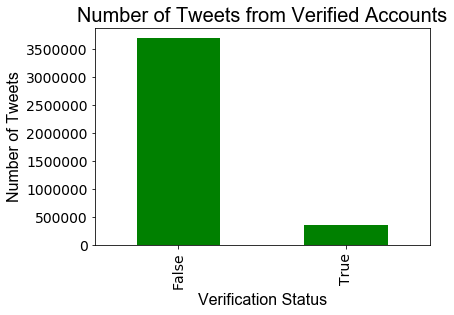

<Figure size 576x576 with 0 Axes>

In [15]:
print('The chart below is a visual representation the amount of tweets from non-verified accounts vs. verified accounts. \n\nTrue: Verified Account \nFalse: Account not Verified')

#COVID_plt = COVID_Tweets_en['Verified Account'].value_counts().plot(kind='bar', color = 'g')
COVID_plt = COVID_Tweets_en['Verified Account'].value_counts().plot(kind='bar', color = 'g')

#Creating our visualization

fig = plt.figure(figsize=(8,8)) 
fig_dims = (3, 2)

COVID_plt.set_title('Number of Tweets from Verified Accounts', fontname='Arial', fontsize=20)
COVID_plt.set_ylabel('Number of Tweets', fontname="Arial", fontsize=16)
COVID_plt.set_xlabel('Verification Status', fontname="Arial", fontsize=16)
for item in (COVID_plt.get_xticklabels() + COVID_plt.get_yticklabels()):
    item.set_fontsize(14)


### How many verified accounts are tweeting about COVID-19

Here we will calculate the total a number of verified users engaged in COVID-19 related social media activities.

In [16]:
Verified_Dataset = COVID_Tweets_en[['Username', 'Verified Account']]
Verified_Accounts = Verified_Dataset[Verified_Dataset['Verified Account']]
Verified_Accounts.loc[Verified_Accounts.duplicated(keep='first'), :].shape

(326560, 2)

In [17]:
NonVerified_Dataset = COVID_Tweets_en[['Username', 'Verified Account']]
NonVerified_Accounts = NonVerified_Dataset[~NonVerified_Dataset['Verified Account']]
NonVerified_Accounts.loc[NonVerified_Accounts.duplicated(keep='first'), :].shape

(2321248, 2)

**Number of Verified Accounts** - 326560

**Number of Non-Verified Accounts** - 2321248 

In [18]:
Num_Verified = 326560
Num_NonVerified = 2321248 

Total_Num_of_Accounts = Num_Verified + Num_NonVerified 

Percentage_of_Verified = Num_Verified / Total_Num_of_Accounts 

Percentage_of_NonVerified = Num_NonVerified / Total_Num_of_Accounts 

In [19]:
print('Total Number of Twitter accounts in the dataset: {} '.format(Total_Num_of_Accounts))
print('Percentage of verified Twitter accounts in the dataset: {:.2f}% '.format(Percentage_of_Verified))
print('Percentage of non-verified Twitter accounts in the dataset: {:.2f}% '.format(Percentage_of_NonVerified))

Total Number of Twitter accounts in the dataset: 2647808 
Percentage of verified Twitter accounts in the dataset: 0.12% 
Percentage of non-verified Twitter accounts in the dataset: 0.88% 


After dropping the duplicate usernames we are able to identify the total amount of verified accounts which are represented by the rows in the '.shape' output. 

From this data we are able to identify that a total of 326,560 users are engaged in COVID-19 Twitter activity which is only 12% of the overall accounts involved. 

# Presence of hashtags in dataset

Here we will search for popular covid related hashtags in the Tweet column. If the hashtag from the respective row exist then it will return a boolean value of `True`.

In [20]:
covid_hashtags = ['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid','#stayathome', '#washyourhands', '#workfromhome']

for hashtag in covid_hashtags:
    COVID_Tweets_en[hashtag] = COVID_Tweets_en['Tweet'].str.contains(hashtag, case= False, na=False)

COVID_Tweets_en.head()

,index,Time,Username,Tweet,Retweet Count,Followers,Friends,Verified Account,#coronavirus,#coronavirusoutbreak,#coronavirusPandemic,#covid,#stayathome,#washyourhands,#workfromhome
0,2,2020-03-19,ANCALERTS,Tips on how to make employees work from home more effectively https://t.co/q1y81MiFpX #LuzonLockdown #COVID19,0,4853083,777,True,False,False,False,True,False,False,False
1,4,2020-03-19,RecruitRetail,"While working from home you can get in a better state of mind if you get out of your pajamas, brush your hair and teeth , and structure your work area #WorkFromHome #CoronaVirusChallenge #COVID19 https://t.co/A0YqSH2WoR",0,256,779,False,True,False,False,True,False,False,True
2,14,2020-03-19,AIDS_United,"We’ve been closely monitoring the unfolding #COVID19 (#coronavirus) outbreak.\n\nFollowing guidance from @CDCgov and @WHO regarding crowds and air travel, #AIDSWatch is going digital this year.\n\nVisit https://t.co/CNkFDF8BDM for updates and to register to join us online March 30. https://t.co/7SDTwaHYxb",0,23430,4393,True,True,False,False,True,False,False,False
3,15,2020-03-19,asayo_kl,Today the Church celebrates the Solemnity of St. Joseph. The #CatholicBishopsofPeninsularMalaysia dedicated this day as a day of prayer and fasting to invoke St. Joseph’s intercession &amp; God’s intervention for an end to #COVID19 crisis.\n\n#StJoseph #PrayForUs #asayokl #archkl https://t.co/Lv3bb0FguK,0,21,29,False,False,False,False,True,False,False,False
4,16,2020-03-19,telesurenglish,Here are the latest news about #COVID19 around the world. \n\nhttps://t.co/KpHUlvgTCr,3,105231,4188,False,False,False,False,True,False,False,False


In [21]:
#Copy dataset
COVID_Tweets_tags = COVID_Tweets_en.copy()

#Drop nonessential columns
COVID_Tweets_tags.drop(['index', 'Username', 'Friends', 'Followers'] , axis = 1, inplace = True)

COVID_Tweets_tags.head()

,Time,Tweet,Retweet Count,Verified Account,#coronavirus,#coronavirusoutbreak,#coronavirusPandemic,#covid,#stayathome,#washyourhands,#workfromhome
0,2020-03-19,Tips on how to make employees work from home more effectively https://t.co/q1y81MiFpX #LuzonLockdown #COVID19,0,True,False,False,False,True,False,False,False
1,2020-03-19,"While working from home you can get in a better state of mind if you get out of your pajamas, brush your hair and teeth , and structure your work area #WorkFromHome #CoronaVirusChallenge #COVID19 https://t.co/A0YqSH2WoR",0,False,True,False,False,True,False,False,True
2,2020-03-19,"We’ve been closely monitoring the unfolding #COVID19 (#coronavirus) outbreak.\n\nFollowing guidance from @CDCgov and @WHO regarding crowds and air travel, #AIDSWatch is going digital this year.\n\nVisit https://t.co/CNkFDF8BDM for updates and to register to join us online March 30. https://t.co/7SDTwaHYxb",0,True,True,False,False,True,False,False,False
3,2020-03-19,Today the Church celebrates the Solemnity of St. Joseph. The #CatholicBishopsofPeninsularMalaysia dedicated this day as a day of prayer and fasting to invoke St. Joseph’s intercession &amp; God’s intervention for an end to #COVID19 crisis.\n\n#StJoseph #PrayForUs #asayokl #archkl https://t.co/Lv3bb0FguK,0,False,False,False,False,True,False,False,False
4,2020-03-19,Here are the latest news about #COVID19 around the world. \n\nhttps://t.co/KpHUlvgTCr,3,False,False,False,False,True,False,False,False


#### Total amount of hashtag uses found in posted tweets within the dataset.

#coronavirus            2540767
#covid                  2453787
#coronavirusPandemic    308664 
#coronavirusoutbreak    179293 
#stayathome             121088 
#washyourhands          14797  
#workfromhome           12886  
dtype: int64


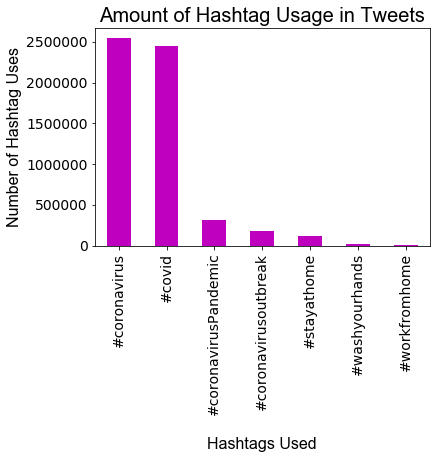

<Figure size 576x576 with 0 Axes>

In [22]:
Tweets = pd.DataFrame(COVID_Tweets_tags[covid_hashtags])

#Counting our hashtag uses
print(COVID_Tweets_tags[covid_hashtags].sum().sort_values(ascending = False))

#Creating our visualization
COVID_plt2 = COVID_Tweets_tags[covid_hashtags].sum().sort_values(ascending = False).plot(kind='bar', color = 'm')

fig = plt.figure(figsize=(8,8)) 
fig_dims = (3, 2)

COVID_plt2.set_title('Amount of Hashtag Usage in Tweets', fontname='Arial', fontsize=20)
COVID_plt2.set_ylabel('Number of Hashtag Uses', fontname="Arial", fontsize=16)
COVID_plt2.set_xlabel('\nHashtags Used', fontname="Arial", fontsize=16)
for item in (COVID_plt2.get_xticklabels() + COVID_plt2.get_yticklabels()):
    item.set_fontsize(14)

#### Total amount hashtag usage within tweets posted and retweeted..

In [23]:
Retweets = pd.DataFrame(COVID_Tweets_tags[COVID_Tweets_tags['Retweet Count'] >= 1])
print(Retweets[covid_hashtags].sum().sort_values(ascending = True))

#workfromhome           2602  
#washyourhands          3485  
#stayathome             30571 
#coronavirusoutbreak    54948 
#coronavirusPandemic    77874 
#covid                  721810
#coronavirus            731824
dtype: int64


#### Total amount of hashtag usage within tweets posted by a verified account in the dataset.

In [24]:
Verified = pd.DataFrame(COVID_Tweets_tags[COVID_Tweets_tags['Verified Account'] == True])
print(Verified[covid_hashtags].sum().sort_values(ascending = True))

#workfromhome           551   
#washyourhands          663   
#stayathome             4032  
#coronavirusPandemic    19202 
#coronavirusoutbreak    22954 
#covid                  203646
#coronavirus            238968
dtype: int64


#### Total amount of hashtag usage within tweets posted by a verified account and then retweeted.

In [25]:
Retweets2 = pd.DataFrame(Verified[COVID_Tweets_tags['Retweet Count'] >= 1])
Retweets2[covid_hashtags].sum().sort_values(ascending = True)

C:\Users\16824\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#workfromhome           316   
#washyourhands          430   
#stayathome             2936  
#coronavirusPandemic    14057 
#coronavirusoutbreak    16161 
#covid                  144696
#coronavirus            173204
dtype: int64

## Data Preprocessing for Term Frequency and Sentiment Analysis

Here we will use machine learning algorithims to conduct a total count of terms used in the dataset and a sentiment analysis to compute the 'feel' of the tweets posted. 

Recreating a dataframe of English tweets

In [26]:
COVID_Sentiment = COVID_Tweets_copy[COVID_Tweets['Language'] == 'en'].reset_index()['Tweet']
print('Rows in Twitter Dataset: ', len(COVID_Sentiment))
COVID_Sentiment.head()

Rows in Twitter Dataset:  4060103


0    Tips on how to make employees work from home more effectively https://t.co/q1y81MiFpX #LuzonLockdown #COVID19                                                                                                                                                                                                     
1    While working from home you can get in a better state of mind if you get out of your pajamas,  brush your hair and teeth , and structure your work area #WorkFromHome #CoronaVirusChallenge #COVID19 https://t.co/A0YqSH2WoR                                                                                      
2    We’ve been closely monitoring the unfolding #COVID19 (#coronavirus) outbreak.\n\nFollowing guidance from @CDCgov and @WHO regarding crowds and air travel, #AIDSWatch is going digital this year.\n\nVisit https://t.co/CNkFDF8BDM for updates and to register to join us online March 30. https://t.co/7SDTwaHYxb
3    Today the Church celebrates the Solemnity of St. Joseph. Th

### Removing Nonessential Text from the Tweets in the Dataset

Here we will remove the nonessential text within the dataset that hold no and act as additional information not necessary during the sentiment analysis.

Removing the URLs from the *Tweets*

In [27]:
COVID_Sentiment_url = COVID_Sentiment.apply(lambda x: re.sub(r"https\S+", "", x))

Changing the tweets to lowercase to allow readibility in our code

In [28]:
COVID_Sentiment_lwr = COVID_Sentiment_url.apply(lambda x: x.lower())

Removing punctuation

In [29]:
COVID_Sentiment_punc = COVID_Sentiment_lwr.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

Removing Stopwords 

We removed the stopwords (and, but, it, etc) and hashtags for the sentiment analysis since they hold no value.

In [30]:
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid','#stayathome', '#washyourhands', '#workfromhome'])

Concatenate tweet into a list of words to run through our machine learning models

In [31]:
COVID_Sentiment_wrds = COVID_Sentiment_punc.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
COVID_Sentiment_wrds.head()

0    tips make employees work home effectively luzonlockdown covid19                                                                                                                                                             
1    working home get better state mind get pajamas brush hair teeth structure work area workfromhome coronaviruschallenge covid19                                                                                               
2    we’ve closely monitoring unfolding covid19 coronavirus outbreak following guidance cdcgov regarding crowds air travel aidswatch going digital year visit updates register join us online march 30                           
3    today church celebrates solemnity st joseph catholicbishopsofpeninsularmalaysia dedicated day day prayer fasting invoke st joseph’s intercession amp god’s intervention end covid19 crisis stjoseph prayforus asayokl archkl
4    latest news covid19 around world                                                           

In [32]:
COVID_Sentiment_concat = [word for line in COVID_Sentiment_wrds for word in line.split()]
COVID_Sentiment_concat[:5]

['tips', 'make', 'employees', 'work', 'home']

Here we can view the text processing and preperation that we have made to analyze the dataset

In [33]:
COVID_Text = pd.DataFrame(COVID_Sentiment)
COVID_Text['Text Processed'] = pd.DataFrame(COVID_Sentiment_wrds)


### Term Frequency

Counting and listing the Top 20 terms and their frequency

In [34]:
counts = Counter(COVID_Sentiment_concat).most_common(20)
COVID_Sentiment_count = pd.DataFrame(counts)
COVID_Sentiment_count.columns = ['Term', 'Frequency']

COVID_Sentiment_count


,Term,Frequency
0,covid19,2414059
1,coronavirus,2305140
2,people,437533
3,amp,416709
4,coronaviruspandemic,306772
5,us,299216
6,cases,248228
7,home,222675
8,pandemic,212785
9,new,209089


Creating a wordcloud to visualize of the top 20 terms in the Twitter dataset

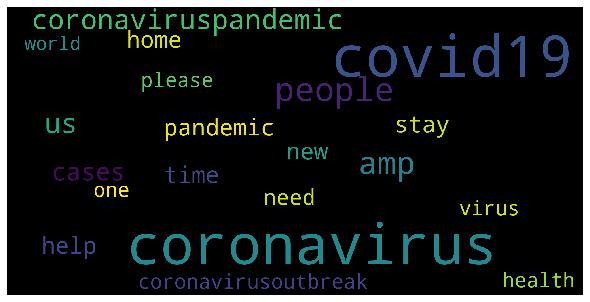

In [35]:
wordcloud = WordCloud(
    background_color='black',
    max_words=20,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(COVID_Sentiment_concat))


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


## Sentiment Analysis

### Calculating the polarity score for each tweet. 

The code will analyze each tweet in the data frame and return a predicted value/score for each sentiment positive/negative/neutral. 


In [36]:
sid = SentimentIntensityAnalyzer()
COVID_Sentiment_polarity = COVID_Sentiment_wrds.apply(lambda x: sid.polarity_scores(x))
COVID_Sentiment_scores = pd.DataFrame(list(COVID_Sentiment_polarity))
COVID_Sentiment_scores.head()

,neg,neu,pos,compound
0,0.000,0.707,0.293,0.4404
1,0.000,0.847,0.153,0.4404
2,0.000,0.919,0.081,0.2960
3,0.178,0.630,0.192,0.1280
4,0.000,1.000,0.000,0.0000


Determining the sentiment of tweets based on their compound and polarity scores.

In [37]:
COVID_Sentiment_scores['sentiment'] = COVID_Sentiment_scores['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
COVID_Sentiment_scores.head()

,neg,neu,pos,compound,sentiment
0,0.000,0.707,0.293,0.4404,positive
1,0.000,0.847,0.153,0.4404,positive
2,0.000,0.919,0.081,0.2960,positive
3,0.178,0.630,0.192,0.1280,positive
4,0.000,1.000,0.000,0.0000,neutral


Calculating the quantitiy of tweets by sentiment

In [38]:
COVID_Sentiment_plt = pd.DataFrame.from_dict(Counter(COVID_Sentiment_scores['sentiment']), orient = 'index').reset_index()
COVID_Sentiment_plt.columns = ['sentiment', 'count']

COVID_Sentiment_plt['%'] = (COVID_Sentiment_plt['count']/COVID_Sentiment_plt['count'].sum()).round(2)
COVID_Sentiment_plt.sort_values('%', ascending=False)

,sentiment,count,%
0,positive,1899249,0.47
2,negative,1257821,0.31
1,neutral,903033,0.22


Creating a data frame of tweets with processed text and the determined sentiment value

In [43]:
COVID_Text['Sentiment'] = COVID_Sentiment_scores['sentiment']
COVID_Text.head(5)

,Tweet,Text Processed,Sentiment
0,Tips on how to make employees work from home more effectively https://t.co/q1y81MiFpX #LuzonLockdown #COVID19,tips make employees work home effectively luzonlockdown covid19,positive
1,"While working from home you can get in a better state of mind if you get out of your pajamas, brush your hair and teeth , and structure your work area #WorkFromHome #CoronaVirusChallenge #COVID19 https://t.co/A0YqSH2WoR",working home get better state mind get pajamas brush hair teeth structure work area workfromhome coronaviruschallenge covid19,positive
2,"We’ve been closely monitoring the unfolding #COVID19 (#coronavirus) outbreak.\n\nFollowing guidance from @CDCgov and @WHO regarding crowds and air travel, #AIDSWatch is going digital this year.\n\nVisit https://t.co/CNkFDF8BDM for updates and to register to join us online March 30. https://t.co/7SDTwaHYxb",we’ve closely monitoring unfolding covid19 coronavirus outbreak following guidance cdcgov regarding crowds air travel aidswatch going digital year visit updates register join us online march 30,positive
3,Today the Church celebrates the Solemnity of St. Joseph. The #CatholicBishopsofPeninsularMalaysia dedicated this day as a day of prayer and fasting to invoke St. Joseph’s intercession &amp; God’s intervention for an end to #COVID19 crisis.\n\n#StJoseph #PrayForUs #asayokl #archkl https://t.co/Lv3bb0FguK,today church celebrates solemnity st joseph catholicbishopsofpeninsularmalaysia dedicated day day prayer fasting invoke st joseph’s intercession amp god’s intervention end covid19 crisis stjoseph prayforus asayokl archkl,positive
4,Here are the latest news about #COVID19 around the world. \n\nhttps://t.co/KpHUlvgTCr,latest news covid19 around world,neutral


List of positive tweets and the positive sentiment values

In [44]:
Positive_Tweets = COVID_Text[COVID_Text.Sentiment == 'positive']
print(Positive_Tweets.shape)
Positive_Tweets.loc[:,['Tweet','Sentiment']].head(5)

(1899249, 3)


,Tweet,Sentiment
0,Tips on how to make employees work from home more effectively https://t.co/q1y81MiFpX #LuzonLockdown #COVID19,positive
1,"While working from home you can get in a better state of mind if you get out of your pajamas, brush your hair and teeth , and structure your work area #WorkFromHome #CoronaVirusChallenge #COVID19 https://t.co/A0YqSH2WoR",positive
2,"We’ve been closely monitoring the unfolding #COVID19 (#coronavirus) outbreak.\n\nFollowing guidance from @CDCgov and @WHO regarding crowds and air travel, #AIDSWatch is going digital this year.\n\nVisit https://t.co/CNkFDF8BDM for updates and to register to join us online March 30. https://t.co/7SDTwaHYxb",positive
3,Today the Church celebrates the Solemnity of St. Joseph. The #CatholicBishopsofPeninsularMalaysia dedicated this day as a day of prayer and fasting to invoke St. Joseph’s intercession &amp; God’s intervention for an end to #COVID19 crisis.\n\n#StJoseph #PrayForUs #asayokl #archkl https://t.co/Lv3bb0FguK,positive
5,What powers do the president and governors have in the US to manage the #COVID19 pandemic? And how should individual rights be balanced w public health at a when safeguarding the nation’s health? @LawrenceGostin responds https://t.co/TEG2cqfR37,positive


List of negative tweets and the negative sentiment values

In [45]:
Negative_Tweets = COVID_Text[COVID_Text.Sentiment == 'negative']
print(Negative_Tweets.shape)
Negative_Tweets.loc[:,['Tweet','Sentiment']].head(5)

(1257821, 3)


,Tweet,Sentiment
6,Is your job affected by the #COVID19 outbreak? Or are you sick or have to care for a family member who is? \nResources are available: \n\nUnemployment Insurance: https://t.co/LVUBTpgRDp \n\nPaid Family Leave: https://t.co/4leCSpnaKV https://t.co/6Md19IDBrc,negative
7,"If you’re a small business or non-profit suffering substantial economic injury as a result of the #COVID19 public health emergency, please visit https://t.co/HzJd0T9YN0 for resources and guidance regarding @SBAgov economic injury loans, and how to apply. https://t.co/6A7t5rv8Yg",negative
20,Many Queenslanders are finding it harder to get their hands on toilet paper as supermarkets struggle to keep up with demand. https://t.co/tyIlL2iGra @annamcgraw_7 #coronavirus #7NEWS https://t.co/Qw70soj4Ht,negative
21,"ERLENDSSON : ""This Is Just A Bizarre &amp; Strange Situation"" - @Erik_Erlendsson \n\n@RonDiazWDAE @IanBeckles @jayRecher \n\n#GoBolts #NHL @NHL #Coronavirus #namethattune \n\nLISTEN \nhttps://t.co/gLqWveVoYX",negative
22,Coronavirus shit fake. The government just want us all inside for 2 weeks so they can change the batteries in pigeons. #coronavirus,negative


Bar chart visualization to compare the amount of positive/negative/neutral tweets. 

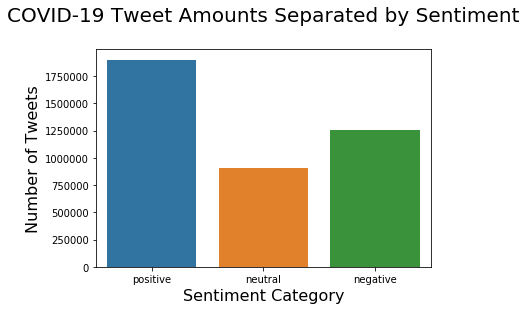

In [42]:
Sentiment_plt = sns.barplot(y="count", x='sentiment',data=COVID_Sentiment_plt)
Sentiment_plt.set_title('COVID-19 Tweet Amounts Separated by Sentiment\n',fontsize=20)
Sentiment_plt.set_xlabel('Sentiment Category',fontsize=16);
Sentiment_plt.set_ylabel('Number of Tweets',fontsize=16);